# Workshop # 5

In [1]:
#Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv("titanic-train.csv")

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df2 = df.loc[:,['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [4]:
print('Age missing ', df2['Age'].isnull().sum())
print('PClass missing ', df2['Pclass'].isnull().sum())
print('SibSp missing ', df2['SibSp'].isnull().sum())
print('Parch missing ', df2['Parch'].isnull().sum())
print('Survived missing ', df2['Survived'].isnull().sum())

Age missing  177
PClass missing  0
SibSp missing  0
Parch missing  0
Survived missing  0


In [5]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

print('Age missing ', df2['Age'].isnull().sum())

Age missing  0


In [6]:
df2['Survived'] = df2['Survived'].astype('category')

In [7]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df2[['Pclass','Sex','Age','SibSp','Parch']], 
                                                    df2['Survived'], 
                                                    train_size=0.7, 
                                                    random_state=123)
print("Labels for training and testing data")
print(train_X)

Labels for training and testing data
     Pclass     Sex   Age  SibSp  Parch
416       2  female  34.0      1      1
801       2  female  31.0      1      1
512       1    male  36.0      0      0
455       3    male  29.0      0      0
757       2    male  18.0      0      0
..      ...     ...   ...    ...    ...
98        2  female  34.0      0      1
322       2  female  30.0      0      0
382       3    male  32.0      0      0
365       3    male  30.0      0      0
510       3    male  29.0      0      0

[623 rows x 5 columns]


In [9]:
print(train_y)

416    1
801    1
512    1
455    1
757    0
      ..
98     1
322    1
382    0
365    0
510    1
Name: Survived, Length: 623, dtype: category
Categories (2, int64): [0, 1]


In [10]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [11]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["male", "female"])
list(le.classes_)
train_X['Sex'] = le.transform(train_X['Sex'])
test_X['Sex'] = le.transform(test_X['Sex'])

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=9)

In [13]:
from sklearn.metrics import accuracy_score
print("Predicting survival on the test set")

y_pred = knn.predict(test_X)

print("Accurary : ", round(accuracy_score(test_y, y_pred),4))
print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))


Predicting survival on the test set
Accurary :  0.7836
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       170
           1       0.74      0.63      0.68        98

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.78      0.78      0.78       268

[[148  22]
 [ 36  62]]


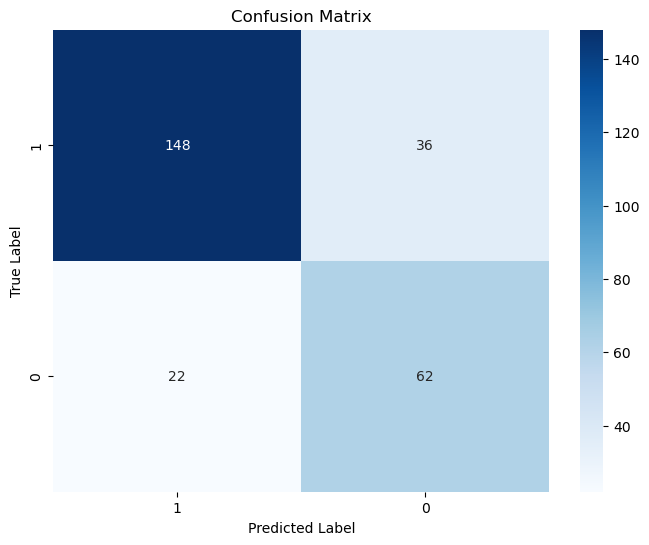

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_pred, test_y), annot=True, fmt='d', cmap='Blues', xticklabels=test_y.unique(), yticklabels=test_y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(test_y, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.752


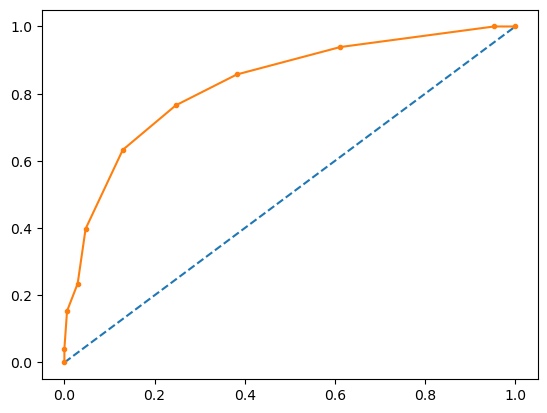

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate roc curve
y_pred_prob = knn.predict_proba(test_X)[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

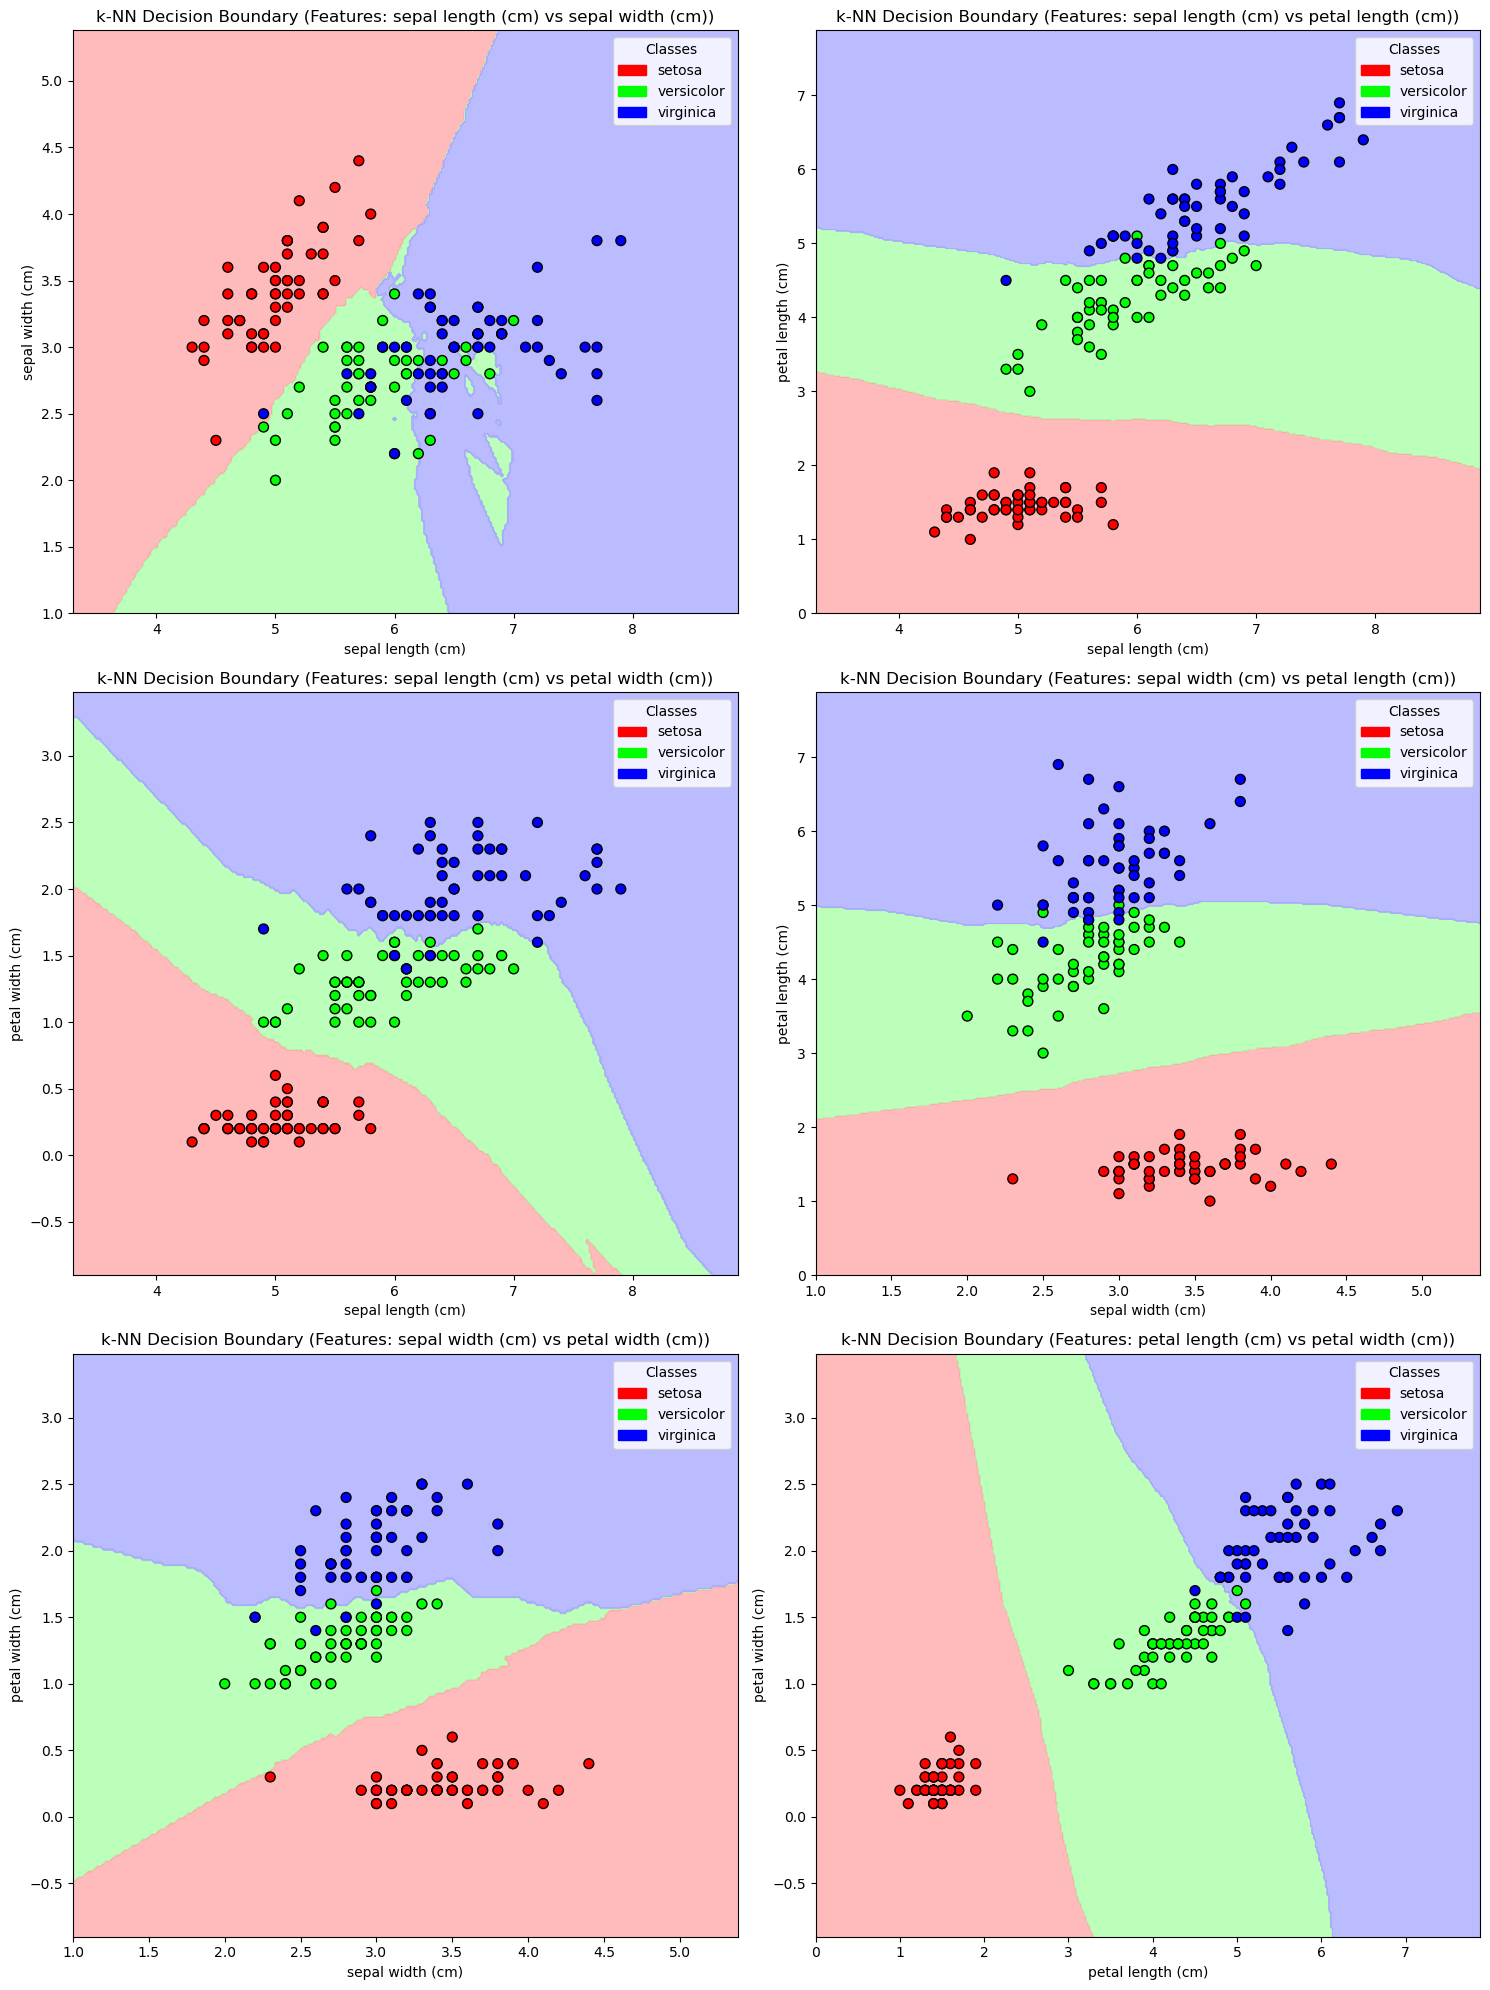

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Load the Iris dataset
iris = load_iris()
X = iris.data  # All four features
y = iris.target

# Define parameters for k-NN
n_neighbors = 11
weights = 'uniform'

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot pairwise decision boundaries
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# Feature pairs (6 unique pairs out of 4 features)
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for idx, (i, j) in enumerate(feature_pairs):
    ax = axes[idx // 2, idx % 2]
    
    # Create k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    knn.fit(X[:, [i, j]], y)

    # Create a mesh grid
    x_min, x_max = X[:, i].min() - 1, X[:, i].max() + 1
    y_min, y_max = X[:, j].min() - 1, X[:, j].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict the classes over the grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)

    # Plot the training points
    scatter = ax.scatter(X[:, i], X[:, j], c=y, cmap=cmap_bold, edgecolor='k', s=50)
    
    # Set plot labels
    ax.set_xlabel(iris.feature_names[i])
    ax.set_ylabel(iris.feature_names[j])
    ax.set_title(f"k-NN Decision Boundary (Features: {iris.feature_names[i]} vs {iris.feature_names[j]})")
    
    # Create a custom legend for each subplot
    legend_handles = [mpatches.Patch(color=cmap_bold(l), label=iris.target_names[l]) for l in np.unique(y)]
    ax.legend(handles=legend_handles, title="Classes", loc="upper right")

plt.tight_layout()
plt.show()
